## Fit manifold learning algorithms to Cell Painting profiles

In [1]:
import pathlib
import numpy as np
import pandas as pd
import umap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
np.random.seed(42)

In [3]:
# Output file info
output_dir = pathlib.Path("embeddings")
output_file = pathlib.Path(f"{output_dir}/l1000_embeddings_umap_tsne.tsv.gz")

In [4]:
# Load L1000 profiles
file = pathlib.Path("l1000_lvl4_cpd_replicate_datasets", "L1000_level4_cpd_replicates.csv.gz")
df = pd.read_csv(file, low_memory=False)

features = df.columns[df.columns.str.endswith("at")].tolist()
meta_features = df.drop(features, axis="columns").columns.tolist()

# Transform PCA to top 200 components
n_components = 200
pca = PCA(n_components=n_components)

pca_df = pca.fit_transform(df.loc[:, features])
pca_df = pd.DataFrame(pca_df)
pca_df.columns = [f"PCA_{x}" for x in range(0, n_components)]

print(pca_df.shape)
pca_df.head()

(27837, 200)


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_190,PCA_191,PCA_192,PCA_193,PCA_194,PCA_195,PCA_196,PCA_197,PCA_198,PCA_199
0,-6.389160,-6.400465,14.077233,0.753761,2.567448,-5.722054,-6.369983,-3.019068,2.036257,-0.235860,...,-0.927909,0.880005,-3.255397,-1.298860,3.964679,1.418204,-1.270352,-2.544128,-0.250492,-1.603419
1,-5.919219,-4.088277,6.416578,11.525015,-1.463180,3.961278,-2.666587,-6.404301,-0.662631,-1.982717,...,-1.821918,0.203990,-0.519860,-1.190182,-0.008568,-1.087701,2.303781,-1.289518,1.694332,-0.634945
2,-1.107931,-2.442468,3.769823,-0.788671,2.512855,-1.227697,1.092680,-1.141361,-0.288009,-2.195829,...,-8.111382,0.859228,-2.049994,-2.732697,-2.634831,1.797834,1.698380,3.250152,0.518284,-0.073383
3,-6.113430,5.029629,-3.840993,12.337079,-16.956524,-25.044390,6.891206,-10.100236,-8.993295,14.292148,...,0.748276,-0.555052,-0.467985,2.213986,-1.377379,0.885463,-0.926847,1.790785,4.040500,-2.386604
4,-12.774649,-4.493031,-12.842855,13.054066,-0.941626,5.618691,-2.446924,-2.683771,-0.837574,-1.956380,...,0.048810,1.524668,-1.743887,-1.226472,-0.241269,-1.105300,0.208759,-1.524010,0.668858,0.772845


### UMAP

In [5]:
# Fit UMAP
reducer = umap.UMAP(random_state=123, min_dist=0.1, n_neighbors=25, metric="euclidean")
umap_embedding_df = reducer.fit_transform(pca_df)

In [6]:
umap_embedding_df = pd.DataFrame(umap_embedding_df)
umap_embedding_df.columns = ["UMAP_0", "UMAP_1"]
umap_embedding_df = pd.concat(
    [
        df.loc[:, meta_features],
        umap_embedding_df
    ],
    axis="columns"
)

umap_embedding_df.head()

,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well,dose,Metadata_broad_sample,pert_iname,moa,UMAP_0,UMAP_1
0,REP.A001_A549_24H_X1_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-0.938541,2.591715
1,REP.A001_A549_24H_X2_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,1.916386,9.042210
2,REP.A001_A549_24H_X3_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,1.168953,7.322549
3,REP.A001_A549_24H_X1_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,1.842477,2.566439
4,REP.A001_A549_24H_X2_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,1.882513,9.295548


<AxesSubplot:xlabel='UMAP_0', ylabel='UMAP_1'>

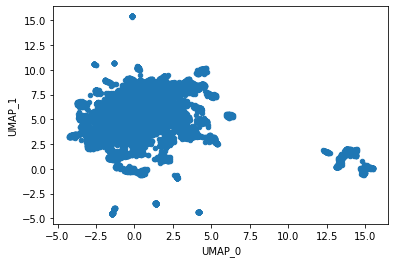

In [7]:
umap_embedding_df.plot(x="UMAP_0", y="UMAP_1", kind="scatter")

### TSNE

In [8]:
tsne_reducer = TSNE(n_components=2, random_state=123, perplexity=50)
tsne_embedding_df = tsne_reducer.fit_transform(pca_df.drop(["PCA_0"], axis="columns"))

In [9]:
tsne_embedding_df = pd.DataFrame(tsne_embedding_df)
tsne_embedding_df.columns = ["TSNE_0", "TSNE_1"]
tsne_embedding_df = pd.concat(
    [
        df.loc[:, meta_features],
        tsne_embedding_df
    ],
    axis="columns"
)

tsne_embedding_df.head()

,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well,dose,Metadata_broad_sample,pert_iname,moa,TSNE_0,TSNE_1
0,REP.A001_A549_24H_X1_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,26.216942,14.270962
1,REP.A001_A549_24H_X2_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-29.899038,-0.095923
2,REP.A001_A549_24H_X3_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-24.144358,5.249119
3,REP.A001_A549_24H_X1_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,31.393736,-5.458164
4,REP.A001_A549_24H_X2_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,3.501958,-42.689407


<AxesSubplot:xlabel='TSNE_0', ylabel='TSNE_1'>

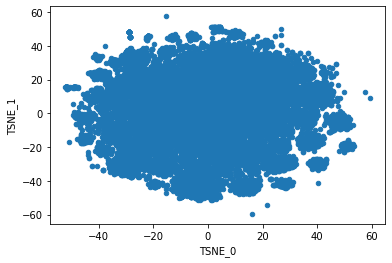

In [10]:
tsne_embedding_df.plot(x="TSNE_0", y="TSNE_1", kind="scatter")

### Merge data and output

In [11]:
embedding_df = umap_embedding_df.merge(tsne_embedding_df, on=meta_features)

# Create column dictating if the perturbation is DMSO or a compound
embedding_df = embedding_df.assign(dmso_label="DMSO")
embedding_df.loc[embedding_df.Metadata_broad_sample != "DMSO", "dmso_label"] = "compound"

# Output file
embedding_df.to_csv(output_file, sep="\t", index=False)

print(embedding_df.shape)
embedding_df.head()

(27837, 15)


,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well,dose,Metadata_broad_sample,pert_iname,moa,UMAP_0,UMAP_1,TSNE_0,TSNE_1,dmso_label
0,REP.A001_A549_24H_X1_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-0.938541,2.591715,26.216942,14.270962,DMSO
1,REP.A001_A549_24H_X2_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,1.916386,9.042210,-29.899038,-0.095923,DMSO
2,REP.A001_A549_24H_X3_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,1.168953,7.322549,-24.144358,5.249119,DMSO
3,REP.A001_A549_24H_X1_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,1.842477,2.566439,31.393736,-5.458164,DMSO
4,REP.A001_A549_24H_X2_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,1.882513,9.295548,3.501958,-42.689407,DMSO


### Level 5 Consensus Signatures

In [12]:
# Output file info
level5_output_file = pathlib.Path(f"{output_dir}/l1000_level5profiles_embeddings_umap_tsne.tsv.gz")

In [13]:
# Load L1000 profiles
file = pathlib.Path("..", "..", "Consensus", "L1000", "moa_sizes_consensus_datasets", "modz_level5_data.csv")
df = pd.read_csv(file, low_memory=False)

features = df.columns[df.columns.str.endswith("at")].tolist()
meta_features = df.drop(features, axis="columns").columns.tolist()

# Transform PCA to top 50 components
n_components = 50
pca = PCA(n_components=n_components)

pca_df = pca.fit_transform(df.loc[:, features])
pca_df = pd.DataFrame(pca_df)
pca_df.columns = [f"PCA_{x}" for x in range(0, n_components)]

print(pca_df.shape)
pca_df.head()

(9482, 50)


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49
0,-3.783109,3.405540,-8.714955,-5.453406,3.794233,0.067132,2.576837,0.824669,-1.685277,-1.535084,...,-1.511878,0.938184,0.818897,0.203520,0.565725,0.477422,-3.461768,-0.063273,-2.166856,0.570775
1,-8.235435,-6.733068,-1.743466,0.523553,5.235302,3.387119,1.915124,-1.876176,-1.964616,-1.372535,...,1.527683,0.066302,3.390557,-1.790036,-2.227195,-0.933327,-1.288332,-2.114180,-0.873445,1.369014
2,-7.841212,-4.208027,-5.784501,-1.675614,3.795388,2.121624,2.864875,-1.383707,-0.342376,0.629407,...,-1.122688,1.182416,0.120939,0.732591,1.458067,1.501035,0.252875,-1.474587,1.321936,2.166762
3,-5.069235,-0.703353,-5.801211,-2.415970,5.373868,1.099687,2.548282,1.083888,-2.831145,-2.492213,...,-1.522817,-3.289814,0.357422,3.438066,-0.245316,0.808508,-2.188559,-0.142298,-0.741010,1.030985
4,-4.354444,1.924937,-3.221122,-3.901319,3.524184,6.120435,2.335365,-0.786221,-1.172381,-1.152042,...,-1.445296,0.171473,3.243683,-0.674174,-3.646876,-1.588447,-2.867200,-2.314447,0.406673,-2.484188


In [14]:
# Fit UMAP
reducer = umap.UMAP(random_state=123, min_dist=0.1, n_neighbors=20, metric="euclidean")
embedding_df = reducer.fit_transform(pca_df.drop(["PCA_0"], axis="columns"))

<AxesSubplot:xlabel='UMAP_0', ylabel='UMAP_1'>

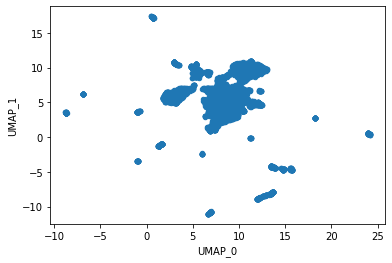

In [15]:
embedding_df = pd.DataFrame(embedding_df)
embedding_df.columns = ["UMAP_0", "UMAP_1"]
embedding_df = pd.concat(
    [
        df.loc[:, meta_features],
        embedding_df
    ],
    axis="columns"
)

embedding_df.plot(x="UMAP_0", y="UMAP_1", kind="scatter")

<AxesSubplot:xlabel='TSNE_0', ylabel='TSNE_1'>

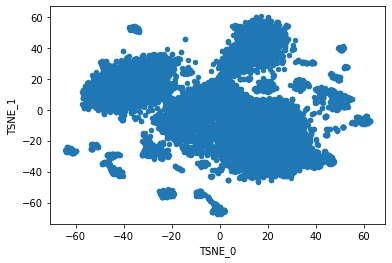

In [16]:
tsne_reducer = TSNE(n_components=2, random_state=123, perplexity=50)
tsne_embedding_df = tsne_reducer.fit_transform(pca_df.drop(["PCA_0"], axis="columns"))

tsne_embedding_df = pd.DataFrame(tsne_embedding_df)
tsne_embedding_df.columns = ["TSNE_0", "TSNE_1"]
tsne_embedding_df = pd.concat(
    [
        df.loc[:, meta_features],
        tsne_embedding_df
    ],
    axis="columns"
)

tsne_embedding_df.plot(x="TSNE_0", y="TSNE_1", kind="scatter")

In [17]:
# Create column dictating if the perturbation is DMSO or a compound
embedding_df = embedding_df.merge(tsne_embedding_df, on=meta_features)

embedding_df = embedding_df.assign(dmso_label="DMSO")
embedding_df.loc[embedding_df.pert_iname != "dmso", "dmso_label"] = "compound"

# Output file
embedding_df.to_csv(level5_output_file, sep="\t", index=False)

print(embedding_df.shape)
embedding_df.head()

(9482, 11)


,sig_id,pert_id,pert_idose,dose,pert_iname,moa,UMAP_0,UMAP_1,TSNE_0,TSNE_1,dmso_label
0,REP.A001_A549_24H:A03,DMSO,-666,0,dmso,control vehicle,9.760765,9.594844,-21.357061,22.800173,DMSO
1,REP.A001_A549_24H:A04,DMSO,-666,0,dmso,control vehicle,10.623908,8.780649,-25.282703,10.583346,DMSO
2,REP.A001_A549_24H:A05,DMSO,-666,0,dmso,control vehicle,9.984703,8.234348,-20.728170,8.221821,DMSO
3,REP.A001_A549_24H:A06,DMSO,-666,0,dmso,control vehicle,10.029015,9.428862,-21.368511,22.253944,DMSO
4,REP.A001_A549_24H:A07,BRD-K25114078,10 uM,6,aminoguanidine,nitric oxide synthase inhibitor,10.229364,9.581270,-26.277916,18.791109,compound
